<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-01-08 15:49:24
-------------------
qualified stocks: 89
with latest results: 84
still star stocks: 44
-------------------
Initial Investment:  1.04 C
CY Investment:  1.17 C
Reserve:  0.00
Current:  1.19 C
-------------------
Today PnL: -56.22 K (-0.47%)
Current PnL: -9.71 L (-8.3%)
CY Booked + Current PnL: 1.79 L (1.53%)
-------------------
Total profit:  4.60 L
Total loss:  -14.31 L
-------------------
Total Booked + Current PnL: 14.90 L (14.34%)
Total Booked PnL: 24.61 L (23.68%)
Curr Year Booked PnL: 11.50 L (9.66%)
Prev Year Booked PnL: 13.11 L (12.62%)
Est FTT:  1.87 C
Est FTT PnL: 68.02 L (57.13%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.29 C (108.39%)
Deployed:  1.04 C
Current:  1.19 C
CAGR/XIRR %: 11.83%
Row successfully appended and saved to data/myPortfolioDB.csv.


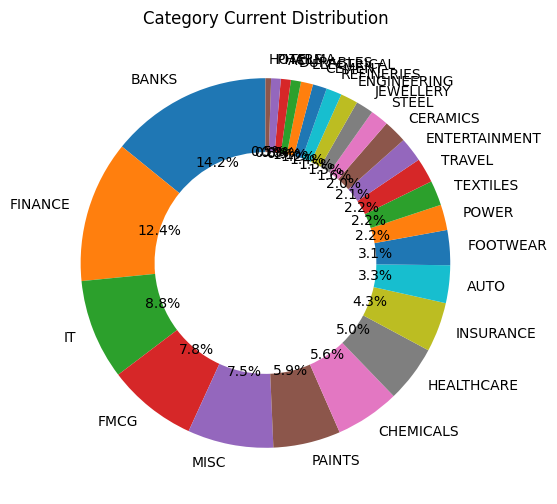

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
12,BANKBARODA,195.74,283.00,-26.20,M-LC,14.61,92015.0,14698.0,19774.0,0.21,...,21.49,44.58,19.0,0.74,0.77,7.67,XR,NTT,LC,BANKS
15,BAYERCROP,4346.57,6805.00,17.88,H-SC,26.97,87564.0,18019.0,21313.0,-1.63,...,24.34,56.56,21.0,0.85,0.74,12.10,X40N,NTT,SC,CHEMICALS
48,LALPATHLAB,2630.06,3545.00,-13.24,H-SC,62.92,131760.0,16037.0,24217.0,-3.42,...,18.38,34.79,19.0,0.66,1.11,49.79,X40N,NTT,SC,HEALTHCARE
72,SIS,477.00,528.00,65.72,M-SC,24.72,59695.0,-21395.0,30062.0,-0.17,...,50.36,10.69,-21.0,-0.71,0.50,0.00,X40N,NTT,SC,MISC
20,CERA,9059.90,10420.45,-7.15,H-SC,38.20,71880.0,-18719.0,32324.0,-2.67,...,44.97,15.02,-51.0,-0.58,0.60,9.13,X40N,ATH,SC,CERAMICS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,REPCOHOME,527.76,880.00,-12.79,M-SC,6.74,151585.0,-43158.0,173140.0,-1.52,...,114.22,66.74,-42.0,-0.25,1.27,10.05,XY24,NTT,SC,FINANCE
65,SAIL,130.64,228.00,47.45,M-MC,11.24,189007.0,-35955.0,203617.0,-1.53,...,107.73,74.53,6.0,-0.18,1.59,2.46,XY24,BTT,MC,STEEL
60,RBLBANK,230.61,388.00,-40.24,M-SC,53.93,164247.0,-70053.0,229962.0,-2.63,...,140.01,68.25,-50.0,-0.30,1.38,6.27,XY24,NTT,SC,BANKS
11,BANDHANBNK,217.54,400.00,-45.61,M-SC,10.11,166437.0,-72204.0,272358.0,-2.10,...,163.64,83.87,-25.0,-0.27,1.40,0.07,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,NESTLEIND,2228.06,2925.0,-19.03,X-LC,77.53,108775.0,-400.0,34547.0,0.33,...,31.76,31.28,NaN,-0.01,0.91,3.26,X40,BTT,LC,FMCG
80,TCS,4164.02,4998.0,1.07,X-LC,41.57,160228.0,-2169.0,34689.0,1.99,...,21.65,20.03,12.0,-0.06,1.35,12.95,X40,BTT,LC,IT
57,PIDILITIND,2482.94,3576.0,-14.58,X-LC,39.33,168664.0,24653.0,38742.0,-0.67,...,22.97,44.02,12.0,0.64,1.42,16.42,X40,BTT,LC,CHEMICALS
26,DMART,3504.64,5112.0,-24.52,X-LC,80.90,142191.0,12519.0,46951.0,0.33,...,33.02,45.86,35.0,0.27,1.19,12.75,AR,NTT,LC,FMCG
10,BAJFINANCE,7055.29,9150.0,-27.27,X-LC,95.51,228017.0,9303.0,55636.0,0.02,...,24.40,29.69,12.0,0.17,1.92,17.13,X40,BTT,LC,FINANCE
36,HINDUNILVR,2443.56,3513.0,-13.28,X-LC,79.78,151263.0,-2681.0,70050.0,0.43,...,46.31,43.77,-5.0,-0.04,1.27,11.34,X40,BTT,LC,FMCG
34,HDFCBANK,1549.96,2170.0,-9.00,X-LC,29.21,355803.0,30311.0,99909.0,-1.11,...,28.08,40.00,10.0,0.30,2.99,24.09,X40,BTT,LC,BANKS
5,ASIANPAINT,2961.56,4250.0,-35.94,X-LC,68.54,158736.0,-42650.0,130259.0,1.82,...,82.06,43.51,-18.0,-0.33,1.33,3.18,X40,BTT,LC,PAINTS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
44,JIOFIN,320.24,387.0,-10.43,M-LC,16.29,147508.0,-10691.0,43662.0,-0.18,...,29.60,20.85,65.0,-0.24,1.24,24.55,XY24,BTT,LC,FINANCE
79,TATAMOTORS,798.82,1065.0,-54.62,M-LC,76.40,162965.0,-793.0,55359.0,0.21,...,33.97,33.32,-70.0,-0.01,1.37,10.07,XY24,NTT,LC,AUTO
19,CAMPUS,294.86,393.0,-4.28,M-SC,69.66,167457.0,-318.0,56165.0,-2.55,...,33.54,33.28,18.0,-0.01,1.41,37.20,XY24,NTT,SC,FOOTWEAR
24,DABUR,518.36,735.0,-8.65,H-MC,85.39,131006.0,-1176.0,56424.0,0.96,...,43.07,41.79,-3.0,-0.02,1.10,4.73,XY24,BTT,MC,FMCG
85,UNIONBANK,123.87,163.0,-17.66,M-MC,2.25,126343.0,-14497.0,58990.0,-1.50,...,46.69,31.59,-20.0,-0.25,1.06,2.66,XY24,NTT,MC,BANKS
29,GICRE,335.06,583.0,13.56,M-MC,97.75,195208.0,48787.0,59558.0,-1.31,...,30.51,74.00,137.0,0.82,1.64,50.89,XY24,BTT,MC,INSURANCE
53,MEDANTA,1022.60,1486.0,-3.08,H-SC,37.08,164076.0,8641.0,61791.0,1.57,...,37.66,45.32,30.0,0.14,1.38,11.64,XY24,NTT,SC,HEALTHCARE
56,NHPC,82.08,115.0,182.38,M-MC,32.58,135705.0,-5308.0,61868.0,-0.25,...,45.59,40.11,-85.0,-0.09,1.14,16.66,XY24,NTT,MC,POWER
71,SHALBY,261.39,327.0,59.11,M-SC,47.19,160187.0,-20956.0,66430.0,-1.73,...,41.47,25.10,-25.0,-0.32,1.35,9.76,XY24,NTT,SC,HEALTHCARE
45,JPPOWER,18.73,26.2,-64.07,L-SC,35.96,129801.0,-12041.0,68613.0,-0.75,...,52.86,39.88,85.0,-0.18,1.09,14.65,XY24,NTT,SC,POWER


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
12,BANKBARODA,195.74,283.00,-26.20,M-LC,14.61,92015.0,14698.0,19774.0,0.21,...,21.49,44.58,19.0,0.74,0.77,7.67,XR,NTT,LC,BANKS
17,BRITANNIA,4845.40,6446.05,-0.76,H-LC,87.08,106918.0,319.0,34898.0,0.57,...,32.64,33.03,239.0,0.01,0.90,5.46,AR,ATH,LC,FMCG
82,TRIDENT,37.35,48.00,65.86,M-SC,1.12,80349.0,-11906.0,38214.0,-1.27,...,47.56,28.51,-11.0,-0.31,0.67,4.06,XR,NTT,SC,TEXTILES
49,LAOPALA,369.40,464.00,-15.84,M-SC,49.44,86746.0,-14100.0,39929.0,0.75,...,46.03,25.61,-41.0,-0.35,0.73,8.10,AR,NTT,SC,CERAMICS
52,MASFIN,326.60,401.09,-29.07,H-SC,57.30,78570.0,-19410.0,41760.0,-0.61,...,53.15,22.81,-74.0,-0.46,0.66,1.73,XR,ATH,SC,FINANCE
40,INDUSINDBK,1354.50,1800.00,-34.59,M-MC,78.65,55920.0,-21286.0,46682.0,-0.26,...,83.48,32.89,-21.0,-0.46,0.47,5.55,XR,NTT,MC,BANKS
26,DMART,3504.64,5112.00,-24.52,X-LC,80.90,142191.0,12519.0,46951.0,0.33,...,33.02,45.86,35.0,0.27,1.19,12.75,AR,NTT,LC,FMCG
25,DEN,52.79,75.00,-20.85,L-SC,66.29,69664.0,-14800.0,50339.0,5.09,...,72.26,42.07,-18.0,-0.29,0.59,7.99,AR,NTT,SC,ENTERTAINMENT
38,IEX,133.39,219.00,-5.84,H-SC,55.06,194572.0,45309.0,50491.0,0.09,...,25.95,64.18,28.0,0.90,1.63,31.92,XR,NTT,SC,MISC
18,BSOFT,628.85,844.81,-5.48,M-SC,22.47,95209.0,-14840.0,52632.0,-0.63,...,55.28,34.34,-22.0,-0.28,0.80,0.00,XR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.40
1,20,33.86
2,30,47.35


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,40.55
X40,21.24
X40N,14.80
XR,14.38
AR,6.18
X200,1.48
SR,1.38


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,34.34
H-SC,16.75
X-LC,12.38
M-MC,11.03
H-LC,10.27
H-MC,6.78
L-SC,3.50
M-LC,3.38


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          17.13
X40       X-LC          11.19
XY24      M-MC           8.97
X40       H-LC           7.89
X40N      M-SC           6.85
          H-SC           6.13
XY24      H-SC           5.38
XR        M-SC           5.33
          H-SC           5.24
XY24      H-MC           3.79
AR        M-SC           2.66
XY24      M-LC           2.61
XR        L-SC           1.82
X40N      H-MC           1.82
X200      H-LC           1.48
SR        M-SC           1.38
XR        M-MC           1.22
AR        X-LC           1.19
X40       H-MC           1.17
XY24      L-SC           1.09
X40       M-SC           0.99
AR        H-LC           0.90
          M-MC           0.84
XR        M-LC           0.77
AR        L-SC           0.59
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.15,-13.30,66.94
FINANCE,12.42,-10.54,57.08
IT,8.76,-6.64,60.23
FMCG,7.84,-1.52,39.51
MISC,7.51,-1.44,39.03
PAINTS,5.88,-17.31,52.02
CHEMICALS,5.63,-8.11,76.32
HEALTHCARE,4.98,7.73,37.93
INSURANCE,4.34,6.29,44.27


In [13]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2831623.0
XR,1301663.0
X40N,973163.0
X40,855895.0
AR,617596.0
SR,180889.0
X200,41414.0


In [14]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,3278542.0
M-MC,878145.0
H-SC,821979.0
X-LC,510783.0
L-SC,377088.0
H-LC,361414.0
H-MC,341032.0
M-LC,118795.0


In [15]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1463447.0
          M-MC           675894.0
XR        M-SC           587740.0
X40N      M-SC           580757.0
X40       X-LC           463832.0
AR        M-SC           409661.0
XR        H-SC           309509.0
X40N      H-SC           307198.0
X40       H-LC           285102.0
XR        L-SC           258136.0
XY24      H-SC           205272.0
          H-MC           204911.0
SR        M-SC           180889.0
XR        M-MC           126504.0
XY24      M-LC            99021.0
X40N      H-MC            85208.0
AR        M-MC            75747.0
XY24      L-SC            68613.0
X40       M-SC            56048.0
          H-MC            50913.0
AR        L-SC            50339.0
          X-LC            46951.0
X200      H-LC            41414.0
AR        H-LC            34898.0
XR        M-LC            19774.0
Name: FTT Amt, dtype: float64

In [16]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,34
H-SC,15
M-MC,10
X-LC,8
H-LC,7
H-MC,6
L-SC,5
M-LC,3
